<a href="https://colab.research.google.com/github/profotoce59/BBL_IA/blob/main/Une_introduction_%C3%A0_l'IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
![](https://github.com/BBL_intro_IA/)

/bin/bash: -c: line 1: syntax error near unexpected token `https://github.com/BBL_intro_IA/'
/bin/bash: -c: line 1: `[](https://github.com/BBL_intro_IA/)'


![Texte alternatif](https://github.com/profotoce59/BBL_IA/raw/main/image/ChatGPT_Image_intro.png?raw=true)

## Comprendre le principe de filtre

Avant de nous attaquer au deep learning il est important de comprendre ce qu'on fait en terme de traitement d'image.
On va notamment s'intéresser dans cette première partie à la notion de noyau appliqué sur une image.

## Une image est une information
Une image est un condensé de données, que l'on appel les pixels.

Populating the interactive namespace from numpy and matplotlib


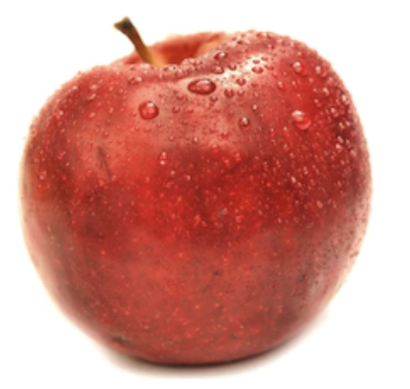

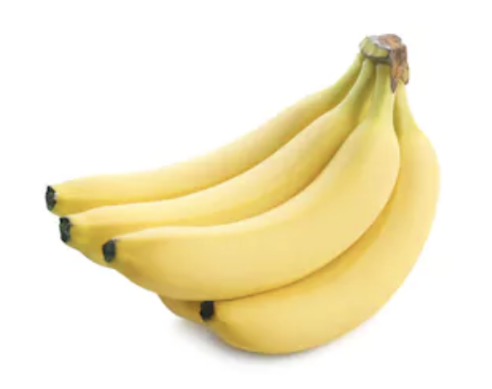

In [4]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

%pylab inline

url_apple = r'https://github.com/profotoce59/BBL_IA/raw/main/image/Pomme1.png?raw=true'
resp = requests.get(url_apple, stream=True).raw
image_array_apple = np.asarray(bytearray(resp.read()), dtype="uint8")
image_apple = cv2.imdecode(image_array_apple, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_apple, cv2.COLOR_BGR2RGB))
plt.show()

url_banana = r'https://github.com/profotoce59/BBL_IA/raw/main/image/Banane1.png?raw=true'
resp = requests.get(url_banana, stream=True).raw
image_array_banana = np.asarray(bytearray(resp.read()), dtype="uint8")

image_banana= cv2.imdecode(image_array_banana, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_banana, cv2.COLOR_BGR2RGB))
plt.show()

## On va diminuer l'information pour la donner à notre modèle mettre l'image en bit (noir ou blanc)

In [ ]:
#Convertir en noir et blanc


In [ ]:
#Fonctionnement d'une convolution

In [ ]:
#définir un filtre qui va garder les trait verticaux


In [ ]:
#définir un filtre qui va garder les trait horizontaux

## Les réseaux de neurones convolutionnels CNN

On peut donc consdiérer un noyau comme un filtre appliqué à l'image pour en tirer des features. Dans un réseau de neurones convolutionnels c'est le réseau qui va trouver lui même les filtres a appliquer aux images.

J'ai construis le dataset moi même en utilisant un dataset kaggle : https://www.kaggle.com/datasets/sriramr/apples-bananas-oranges?resource=download

In [ ]:
#Import dataset
import pathlib
import os
import zipfile
zip_url = "https://github.com/profotoce59/BBL_IA/raw/main/original_data_set.zip"
zip_path = tf.keras.utils.get_file("original_data_set.zip", zip_url)

# 📂 Décompression dans le répertoire "dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")

data_dir = pathlib.Path('dataset')

In [ ]:
#afficher le nombre d'image de notre dataset

In [ ]:
#définitions du format de nos images en entrée :

In [ ]:
import numpy as np
import collections
#définition de nos données d'entrainement et de validation


In [ ]:
#voici un exemple d'entrée

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
#définition de notre réseau de neurones


In [ ]:
#résumé de nos couches de neurones

## Charge une image et teste la


In [ ]:
from google.colab import files
# Charger une image depuis ton ordi
file_to_predict = files.upload()

for file_ in file_to_predict:
    # Charger l'image avec OpenCV (en BGR)
    image_to_predict = cv2.imread(file_, cv2.IMREAD_COLOR)

    # Convertir en RGB (car OpenCV charge en BGR)
    image_to_predict_rgb = cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB)

    # Afficher l'image
    plt.imshow(image_to_predict_rgb)
    plt.axis('off')
    plt.title("Image chargée")
    plt.show()

    # Redimensionner à la bonne taille et ajouter dimension batch
    img_to_predict = cv2.resize(image_to_predict_rgb, (200, 200))
    img_to_predict = np.expand_dims(img_to_predict, axis=0)  # PAS de /255 ici

    # Prédiction (le modèle a déjà Rescaling)
    prediction = model.predict(img_to_predict)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Affichage du résultat
    class_label = class_names[predicted_class]
    print(f"🍏 Prédiction : {class_label.upper()} ({prediction[0][predicted_class]*100:.1f}%)")

#Comprendre ce qu'il y a dans les filtres au moment de l'exécution

In [ ]:
#display filters for apple
import math

def display_image_filtered(name_image, model, layer_name, image):
    feature_map_1 = tf.keras.Model(inputs=model.layers[0].input,
                                 outputs=model.get_layer(layer_name).output)

    img = cv2.resize(image, (200, 200))
    input_img = np.expand_dims(img, axis=0)

    f = feature_map_1.predict(input_img)
    dim = f.shape[3]

    print(f'{layer_name} | Features Shape: {f.shape}')
    print(f'Dimension {dim}')

    fig = plt.figure(figsize=(20, 20))

    output_dir = f'results_{name_image}'
    os.makedirs(output_dir, exist_ok=True)

    rows = math.ceil(math.sqrt(dim))
    cols = math.ceil(dim / rows)

    for i in range(dim):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.axis('off')
        ax.imshow(f[0, :, :, i], cmap='viridis')

        # Optionnel : sauvegarder chaque filtre
        plt.imsave(f'{output_dir}/{name_image}_{layer_name}_{i}.jpg', f[0, :, :, i], cmap='viridis')

    plt.tight_layout()
    plt.show()


num = 33
# Affichage des noms des couches convolutionnelles et pooling
conv_layers = [layer.name for layer in model.layers if 'conv2d' in layer.name]
pool_layers = [layer.name for layer in model.layers if 'max_pooling2d' in layer.name]


for name in ['apple', 'banana']:
    image = image_apple if name == 'apple' else image_banana

    # Afficher l'image d'origine
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Image originale - {name.upper()}")
    plt.show()

    print(f"\n🔍 Feature maps pour {name.upper()} :\n")

    for i in range(len(conv_layers)):
        print('-----------------------------------------------------')
        print(f'🧠 {i+1}ère couche CONV : {conv_layers[i]}')
        display_image_filtered(name, model, conv_layers[i], image)

        if i < len(pool_layers):  # on évite de dépasser
            print(f'💧 {i+1}ère couche POOLING : {pool_layers[i]}')
            display_image_filtered(name, model, pool_layers[i], image)
        print('-----------------------------------------------------')

In [ ]:
files.download("/content/results_apple.zip")
files.download("/content/results_banana.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>